## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [2]:
#Seu Código aqui....
from google.colab import files
uploades = files.upload()


Saving aptos.csv to aptos.csv


In [3]:
aptos = pd.read_csv("aptos.csv")
aptos.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: tamanho apartamento em metros quadrados 
-   Valor: valor do apartamento em mil
-   Quartos: quantidade de quartos no apartamento
-   Vagas: quantidade de vagas de estacionar o apartamento possui
-   Reformado: se o apartamento é ou não é reformado

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1. Eu acho que o preço do apartamento sobe de acordo com o tamanho dele.
2. Eu acho que o tamanho do apartamento é maior de acordo com a quantidade de quartos que ele possui.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

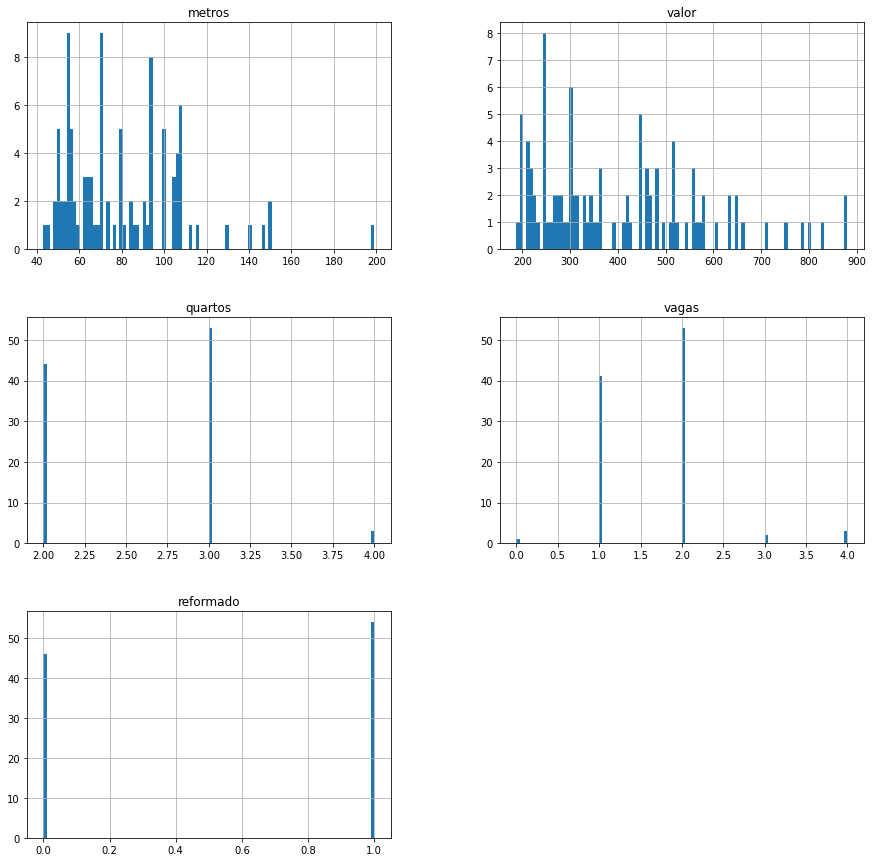

In [4]:
#Seu Código aqui...
aptos.hist(bins=100, figsize=(15, 15))
plt.show()



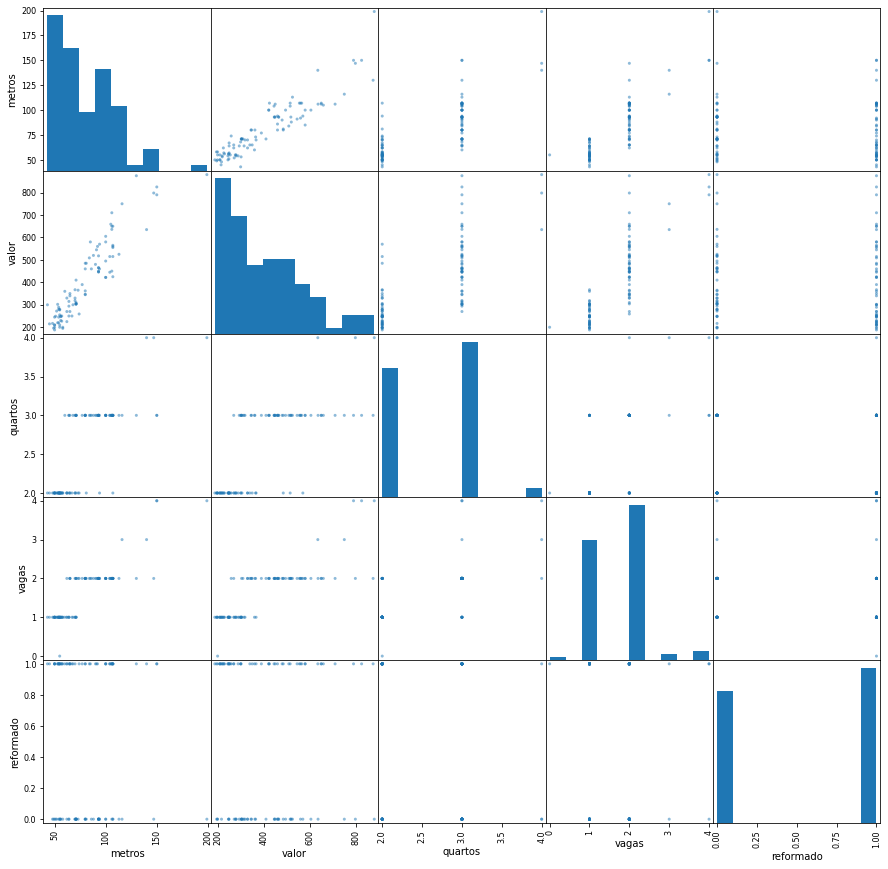

In [5]:
#Seu Código aqui...
from pandas.plotting import scatter_matrix
scatter_matrix(aptos,figsize=(15, 15))
plt.show()




### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear 
2. Regressão Logística

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Regressão Linear: É uma técnica que consiste em representar um conjunto de dados por meio de uma reta. 
2. Regressão Logística: É uma técnica estatística que busca produzir (usando um conjunto de observações) um modelo que possibilita predizer os valores tomados por uma variável categórica.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [6]:
aptos.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [62]:
#Seu Código aqui...
aptos[['metros', 'quartos', 'vagas']]

,metros,quartos,vagas
0,107,3,2
1,107,3,2
2,49,2,1
3,104,3,2
4,92,3,2
...,...,...,...
95,100,3,2
96,105,3,2
97,55,2,0
98,53,2,1


Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [9]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [56]:
#Seu Código aqui...
X = aptos[['metros', 'quartos','vagas']]
y = aptos['reformado']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [57]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

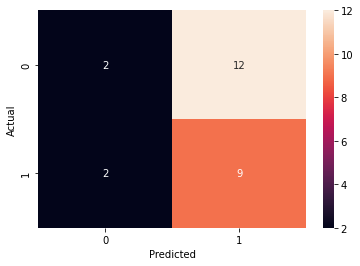

In [58]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [59]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.44


In [61]:
apartamento = {'metros': 65, 'quartos': 2, 'vagas': 2}
dft = pd.DataFrame(data = apartamento,index=[0])
print(dft)
resultado = logistic_regression.predict(dft)

   metros  quartos  vagas
0      65        2      2


### Algoritmo 2

In [17]:
#Seu Código aqui...
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Escolhendo as colunas preditivas e alvo
x = aptos.drop(columns = ['metros','quartos', 'vagas', 'reformado', 'bairro']) # Colunas descritivas
y = aptos['valor']                # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)

lr.fit(x_train,y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [23]:
y_predicoes = lr.predict(x_test) 

In [24]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  4.689582056016661e-14


In [25]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

MSE:  4.402474939857423e-27


In [26]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)

R2:  1.0


In [28]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0])

ρ: 1.0


In [29]:
a_modelo = lr.coef_      # Coeficientes angulares do modelo (cada um mede a influência de cada coluna)
b_modelo = lr.intercept_ 

In [30]:
print(a_modelo, b_modelo)

[1.] 1.1368683772161603e-13


In [31]:
R2_treinamento = lr.score(x_train, y_train)
print(R2_treinamento)

1.0


In [32]:
y_pred_linear = y_predicoes

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler() # Criando o objeto de escalonamento
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [38]:
from sklearn.neural_network import MLPRegressor

In [39]:
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42, # (seed) pesos da rede são inicializados aleatoriamente
                             hidden_layer_sizes=(10,4), # Quantidade de neuronios por camada oculta #(12,7,3)
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train_escalonado, y_train)

MLPRegressor(hidden_layer_sizes=(10, 4), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

In [40]:
y_predicoes = ml_perceptron.predict(x_test_escalonado) # Perceba que estamos passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

R2:  0.9999999962024699
ρ: 0.9999999981159218
MAE:  0.006259945455097693
MSE:  8.83728828610732e-05


In [41]:
y_predicoes_mlp = y_predicoes

In [42]:
import seaborn as sns

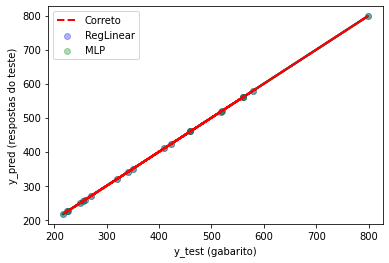

In [43]:
ax = sns.regplot(x=y_test,y=y_pred_linear,
                 color="b", scatter_kws={'alpha':0.3}, label='RegLinear')
ax = sns.regplot(x=y_test,y=y_predicoes_mlp,
                 color="g", scatter_kws={'alpha':0.3}, label='MLP')
ax.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto') 
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas do teste)') 
ax.legend()

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** Regressão Linear

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
#Seu Código aqui...



## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: O modelo desenvolvido por regressão linear obteve um resultado satisfatório. Todavia, o modelo desenvolvido por regressão logística não obteve um resultado satisfatório, pois a acuracia não foi de alta porcetagem.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Para obter um resultado diferente, eu usaria de mais informacões (colunas) sobre o apartamento.




